In [1]:
import time                                                 
inicio=time.time()                                          

   
import pandas as pd                                      
import numpy as np
# Display all columns 
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt       
import seaborn as sns         

#from sklearn.metrics import confusion_matrix                # metricas, matriz de confusion
#from scipy.optimize import minimize                         # minimizar, opt


import warnings                                             # avisos
warnings.filterwarnings('ignore', category=RuntimeWarning)

In [1]:
from sklearn.model_selection import train_test_split as tts
from sklearn.decomposition import PCA

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import SGDClassifier as SGDC
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.naive_bayes import MultinomialNB as MNB
from sklearn.naive_bayes import ComplementNB as CNB
from sklearn.linear_model import LinearRegression as LinReg


In [3]:
from sklearn.linear_model import *

In [4]:
#import xgboost as xgb

### Limpieza de Nans

In [5]:
#data.dropna(thresh=len(data)//2,axis=1, inplace=True)
#trash_1 = list(data.loc[:, data.isna().sum() >= 1000])
def delete_nan(df):
    data_1 = df.loc[:, df.isnull().mean() >= .5]
    print(data_1.columns)
    return df.drop(data_1,axis=1,inplace=True)

### Limpieza de columnas:

In [6]:
def trash_d(df):
    df_col = df.columns
    trash = []
    for i in df_col:
        if 'url' in i:

            trash.append(i)
        elif 'id' in i:

            trash.append(i)
        elif 'name' in i:

            trash.append(i)
        elif 'scrape' in i:

            trash.append(i)
        elif 'license' in i: #is it relevant??

            trash.append(i)
        elif 'latitude' in i:

            trash.append(i)
        elif 'longitude' in i:

            trash.append(i)

    print(trash)
    return df.drop(trash,axis=1,inplace=True)
       

### Analizar la correlacion entre las columnas y eliminar las que tienen corr > 90%

In [7]:
def bin_corr_col(x):
                                        
    corr_matrix = x.corr().abs()# Create correlation matrix
                                        
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)) # Select upper triangle of correlation matrix
    
    to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]# Find features with correlation greater than 0.90

    return x.drop(to_drop, axis=1, inplace=True) # Drop features

### Funcion para limpiar columna de 'Bathroom text'

In [8]:
import re

patron='[0-9]+'

def limpieza_ba(x):
    n_ba=0
    
    try:
        n_ba=int(re.findall(patron, x)[0])
    except:
        n_ba=0
        
    return n_ba

### Fill 'Nan' values in Bedroom & Bed columns:

In [9]:
def fill_bedroom_bed(df):
    for i in zip(bedrom_bed.values):
            if i[0][0] != i[0][0]:
                bedrom_bed.fillna(i[0][1], axis=0, inplace=True)
            elif i[0][1]!= i[0][1]:
                bedrom_bed.fillna(i[0][0], axis=0, inplace=True)
            else:
                pass
    print('The Sum of all Nan values in bedroom and bed\n',df.isna().sum())
    df.columns=['bedrooms_new','beds_new']

      

### Rellenar Nan's:

In [10]:
def fill_nan(df):
    
    for i in df.columns:
        
        df.fillna(0, axis=0, inplace=True)

    print(df.isna().sum())

### Funcion para entrenar Modelo:

In [11]:
def prueba_modelo(modelo):

    modelo.fit(X_train, y_train)

    y_pred=modelo.predict(X_test)

    train_score=modelo.score(X_train, y_train)  
    test_score=modelo.score(X_test, y_test)
    
    print(modelo)
    print('Train:', train_score)
    print('Test:', test_score) 
    print('\n')

## 1.Train CSV:

**Import Train Data** 

In [12]:
df_train = pd.read_csv('data/train.csv')


In [13]:
df_TN = df_train._get_numeric_data()

### 1.1 Analisis Exploratorio:

In [14]:
df_train.shape

(4167, 74)

### 1.2 Limpieza Basica:

**1.2.1 Aplicamos funcion de limpieza basica, columnas, id,url...**

In [15]:
trash_d(df_train)

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_thumbnail_url', 'host_picture_url', 'host_identity_verified', 'latitude', 'longitude', 'calendar_last_scraped', 'license']


In [16]:
df_train.shape

(4167, 58)

In [17]:
df_train.sample(3)

,description,neighborhood_overview,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
600,This charming canal house of 75m2 is in a wond...,The canal house is situated in a wonderful pos...,2013-08-03,"Amsterdam, North Holland, The Netherlands",NaN,within an hour,100%,80%,f,NaN,1,1,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,"Amsterdam, Noord-Holland, Netherlands",Centrum-Oost,NaN,Entire townhouse,Entire home/apt,3,NaN,2 baths,2.0,2.0,"[""Extra pillows and blankets"", ""Hot water kett...",125.0,25,30,25.0,25.0,30.0,30.0,25.0,30.0,NaN,t,0,0,29,29,8,3,0,2021-07-29,2019-02-12,5.00,5.00,5.00,4.88,5.00,5.00,4.88,f,1,1,0,0,1.83
298,"<b>The space</b><br />Dear all, <br /><br />If...","The famous ""pijp"" area in Amsterdam is one of ...",2013-06-01,"Amsterdam, North Holland, Netherlands","Hi I'm Kalina from Amsterdam, 31 years old. I ...",within a few hours,100%,100%,f,De Pijp,1,1,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,"Amsterdam, North Holland, Netherlands",De Pijp - Rivierenbuurt,NaN,Entire rental unit,Entire home/apt,2,NaN,1.5 baths,1.0,NaN,"[""Luggage dropoff allowed"", ""Hair dryer"", ""Sto...",250.0,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,20,50,80,170,44,1,1,2016-08-01,2019-02-07,4.75,4.86,4.84,4.76,4.91,4.86,4.45,f,1,1,0,0,0.68
1328,If you are looking for a comfortable place in ...,The lively van woustreet is in walking distanc...,2014-02-23,"Amsterdam, North Holland, Netherlands",Hi! My name is Mara and I am currently living ...,within a day,100%,50%,f,De Pijp,1,1,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,"Amsterdam, Noord-Holland, Netherlands",De Pijp - Rivierenbuurt,NaN,Entire rental unit,Entire home/apt,3,NaN,1.5 baths,1.0,1.0,"[""Hair dryer"", ""Stove"", ""Washer"", ""Dishes and ...",69.0,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,0,0,0,0,5,2,0,2020-09-05,2021-09-10,4.40,4.40,3.60,5.00,5.00,5.00,4.20,f,1,1,0,0,0.33


**1.2.2 Vemos columnas con Nan en el -df_train > 50%-**

In [18]:
Col_30_Nan = df_train.loc[:, df_train.isnull().mean() >= .3]
print(Col_30_Nan.columns)
f'Hay {len(Col_30_Nan.columns)} con un 30% de valores Nan'

Index(['host_about', 'host_response_time', 'host_response_rate',
       'host_neighbourhood', 'neighbourhood_group_cleansed', 'bathrooms',
       'calendar_updated'],
      dtype='object')


'Hay 7 con un 30% de valores Nan'

Eliminaremos el resto de columnas:

**Observaciones:**

Observacion_1: 

Observamos que hay 7 columnas con un 30% de valores Nan, todas parecen ser inservibles, excepto 'host_response_rate', (haciendo una valoracion No experta, mas una suposicion) que nos puede dar informacion valiosa.



Columns:

- number_of_reviews
- bathrooms
- host_listings_count
- minimum_nights
- maximum_nights
- number_of_reviews
- accommodates
- Price
['accommodates','number_of_reviews','maximum_nights','minimum_nights','host_listings_count','price']
**Remaining columns to include in the prediction model:**

- property_type	
- room_type
- property_type_Other


**Eliminamos columnas inservibles (En principio...)** 

In [19]:
df_train.drop(Col_30_Nan, axis=1, inplace=True)

In [20]:
df_train.shape

(4167, 51)

In [21]:
df_train.columns

Index(['description', 'neighborhood_overview', 'host_since', 'host_location',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'neighbourhood', 'neighbourhood_cleansed',
       'property_type', 'room_type', 'accommodates', 'bathrooms_text',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'revi

In [22]:
df_train.head(2)

,description,neighborhood_overview,host_since,host_location,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,neighbourhood,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,A waggon luxurous designed as a hotel room on ...,"Waterland is a beautiful countryside area, wit...",2012-07-24,"Amsterdam, North Holland, The Netherlands",75%,f,13,13,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,"Amsterdam, North Holland, Netherlands",Noord-Oost,Private room in farm stay,Private room,3,1.5 shared baths,1.0,NaN,"[""First aid kit"", ""Free parking on premises"", ...",87.0,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,t,0,0,0,249,81,0,0,2014-08-03,2019-06-15,4.62,4.56,4.29,4.57,4.75,4.69,4.49,f,10,0,10,0,0.91
1,Are you looking for a perfect place to stay in...,Our home is located in the Plantagebuurt. A un...,2015-06-01,"Amsterdam, Noord-Holland, Netherlands",NaN,f,0,0,"['email', 'phone', 'reviews']",t,"Amsterdam, Noord-Holland, Netherlands",Centrum-Oost,Entire rental unit,Entire home/apt,4,1 bath,2.0,2.0,"[""Hot water kettle"", ""Pocket wifi"", ""Stove"", ""...",250.0,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,t,3,3,3,3,9,4,1,2020-01-26,2021-09-05,5.00,5.00,5.00,4.89,5.00,5.00,4.89,f,1,1,0,0,0.40


**Most Intersting columns:**


for n,c in enumerate(df_train.columns):
    print(n,c)

!!$$!OJOS!!! PORQUE SELECCIONAMOS ESTAS COLUMNAS, HACER PROCEDIMIENTO QUE JUSTIFIQUE LA SELECCION!!!

**1.2.2 Seleccionamos las columnas interesantes:**




In [63]:
new_train = df_train.loc[:, ['number_of_reviews','maximum_nights','minimum_nights','host_listings_count','price']]





In [64]:
new_train.isna().sum()


number_of_reviews      0
maximum_nights         0
minimum_nights         0
host_listings_count    0
price                  0
dtype: int64

**Proximos pasos:**
    
1. Bathrooms 
2. fill na con 0 y o mean
3. Hacer testeo

**1.2.3 Añadimos la columna 'bathrooms' limpia con datos numericos extraidos:**

* **ATENCION! La columna de bathrooms, hay que limpiarla bien, en esta transfromacion no esta correctamente limpia!**

In [65]:
new_train.head(2)

,number_of_reviews,maximum_nights,minimum_nights,host_listings_count,price
0,81,1125,2,13,87.0
1,9,1125,2,0,250.0


In [66]:
#new_train['bathroom']=df_train.bathrooms_text.apply(limpieza_ba)

In [67]:
new_train.head(3)

,number_of_reviews,maximum_nights,minimum_nights,host_listings_count,price
0,81,1125,2,13,87.0
1,9,1125,2,0,250.0
2,47,1125,1,20,151.0


In [68]:
new_train.isna().sum()

number_of_reviews      0
maximum_nights         0
minimum_nights         0
host_listings_count    0
price                  0
dtype: int64

### 1.2 Correlacion de las columnas in Train DF:

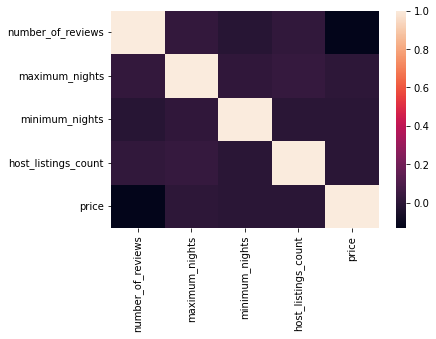

In [69]:
sns.heatmap(new_train.corr());

**BEDROOMS**

In [70]:
bedrom_bed = df_train.loc[:, ['bedrooms', 'beds']]


for i in zip(bedrom_bed.values):
        if i[0][0] != i[0][0]:
            bedrom_bed.fillna(i[0][1], axis=0, inplace=True)
        elif i[0][1]!= i[0][1]:
            bedrom_bed.fillna(i[0][0], axis=0, inplace=True)

bedrom_bed.head()

,bedrooms,beds
0,1.0,1.0
1,2.0,2.0
2,1.0,1.0
3,1.0,1.0
4,1.0,2.0


In [71]:
new_train = new_train.assign(beds_new=bedrom_bed.bedrooms.values)

In [72]:
new_train.head()

,number_of_reviews,maximum_nights,minimum_nights,host_listings_count,price,beds_new
0,81,1125,2,13,87.0,1.0
1,9,1125,2,0,250.0,2.0
2,47,1125,1,20,151.0,1.0
3,10,30,2,1,139.0,1.0
4,166,7,2,1,95.0,1.0


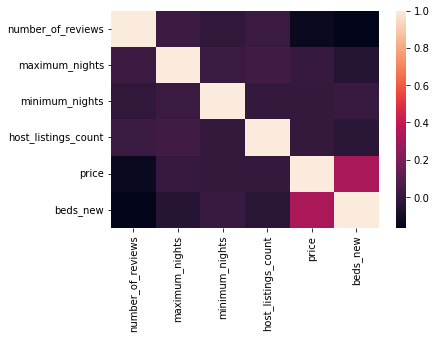

In [73]:
sns.heatmap(new_train.corr());

### 1.3 Arbol de decision: importancia de cada columna:

- DTR

### 1.4 Modelo Train Data:

In [74]:
X=new_train.drop('price', axis=1)
y=new_train.price

In [75]:
X_train, X_test, y_train, y_test = tts(X, y, 
                                       test_size=0.15, random_state=42)

In [76]:
def prueba_modelo(modelo):

    modelo.fit(X_train, y_train)

    y_pred=modelo.predict(X_test)

    train_score=modelo.score(X_train, y_train)  
    test_score=modelo.score(X_test, y_test)
    
    print(modelo)
    print('Train:', train_score)
    print('Test:', test_score) 
    print('\n')

In [77]:
modelos=[LinReg(), Lasso(),RFR(),SGDC(),GNB(),MNB(),CNB()]

for m in modelos:
    prueba_modelo(m)

LinearRegression()
Train: 0.09885675536863447
Test: 0.30109098215025654


Lasso()
Train: 0.09882089122817383
Test: 0.2996178469811962


RandomForestRegressor()
Train: 0.7198880504866545
Test: -3.0085824341307656


SGDClassifier()
Train: 0.0073425585992657446
Test: 0.003194888178913738


GaussianNB()
Train: 0.06325896639367411
Test: 0.004792332268370607


MultinomialNB()
Train: 0.024851736797514828
Test: 0.009584664536741214


ComplementNB()
Train: 0.021462863597853713
Test: 0.023961661341853034




#### * CON RANDOM FOREST

### 1.3.1 R2

modelo.score(X_test, y_test)# R2 cuanto mas cercano a 1 mejor 

y_pred=modelo.predict(X_test)


y_pred.shape

### 1.3.2 MSE (Mean Squared Error)

mse(y_pred, y_test, squared=False)

**Predictions Variable RFR:**

y_pred

### * Con LinReg

X_train, X_test, y_train, y_test = tts(new_train.drop('price',axis=1), 
                                               new_train.price)

modelo=LinReg()

modelo.fit(X_train, y_train)

### 1.3.1 R2

modelo.score(X_test, y_test)# R2 cuanto mas cercano a 1 mejor 

y_pred_LR=modelo.predict(X_test)


y_pred.shape

### 1.3.2 MSE (Mean Squared Error)

mse(y_pred, y_test, squared=False)

## 2. Test CSV:

**Import Test Data**

In [34]:
test_df=pd.read_csv('data/test.csv')
test_df.shape

(1389, 73)

#### 2.1 Asigning the same columns present in Train DF to Test DF

In [35]:
test_DF = test_df.loc[:, ['accommodates','number_of_reviews','maximum_nights','minimum_nights','host_listings_count',]]

test_DF.isna().sum()


accommodates           0
number_of_reviews      0
maximum_nights         0
minimum_nights         0
host_listings_count    0
dtype: int64

#### 2.2 Adding 'bathroom' column to Test DF

In [36]:
#test_DF['bathroom']=test_df.bathrooms_text.apply(limpieza_ba)

In [56]:
test_DF.isna().sum()

accommodates           0
number_of_reviews      0
maximum_nights         0
minimum_nights         0
host_listings_count    0
dtype: int64

#### 2.3 Correlacion de las columnas in Test DF:

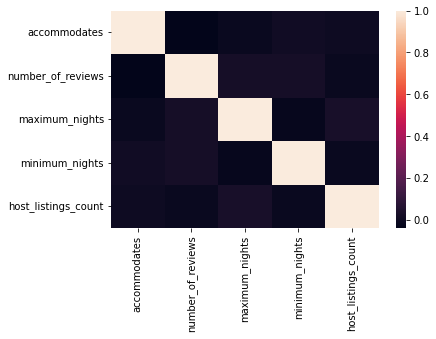

In [38]:
sns.heatmap(test_DF.corr());

## 4. Listamos las columnas de los Data frames Train & Test

In [39]:
new_train.shape,test_DF.shape

((4167, 6), (1389, 5))

#### Train Data frame  (NUESTRO)

In [40]:
new_train.isna().sum()

accommodates           0
number_of_reviews      0
maximum_nights         0
minimum_nights         0
host_listings_count    0
price                  0
dtype: int64

#### Test de Data Frame

In [41]:
test_DF.isna().sum()

accommodates           0
number_of_reviews      0
maximum_nights         0
minimum_nights         0
host_listings_count    0
dtype: int64

### 5. Entrenamos Modelos:

In [42]:
X=new_train.drop('price', axis=1)
y=new_train.price

In [43]:
X_train, X_test, y_train, y_test = tts(X, y, 
                                       test_size=0.15, random_state=42)

In [44]:
def prueba_modelo(modelo):

    modelo.fit(X_train, y_train)

    y_pred=modelo.predict(X_test)

    train_score=modelo.score(X_train, y_train)  
    test_score=modelo.score(X_test, y_test)
    
    print(modelo)
    print('Train:', train_score)
    print('Test:', test_score) 
    print('\n')

In [45]:
modelos=[LinReg(), Lasso(),RFR(),SGDC(),GNB(),MNB(),CNB()]

for m in modelos:
    prueba_modelo(m)

LinearRegression()
Train: 0.10712614051484826
Test: 0.266207802706108


Lasso()
Train: 0.10711256779536882
Test: 0.26628469907279606


RandomForestRegressor()
Train: 0.7199757596665577
Test: -3.2738882225684023


SGDClassifier()
Train: 0.003953685399604632
Test: 0.0


GaussianNB()
Train: 0.06438859079356114
Test: 0.006389776357827476


MultinomialNB()
Train: 0.028523016097147698
Test: 0.007987220447284345


ComplementNB()
Train: 0.021462863597853713
Test: 0.023961661341853034




### Prediction on Test DF

Here we place the **Test DF** into the model we have trained. 



In [46]:
y_pred=modelo.predict(test_DF)

NameError: name 'modelo' is not defined

In [ ]:
y_pred.shape

In [ ]:
f"Train : {modelo.score(X_train, y_train)} Test: {modelo.score(X_test, y_test)}"


In [ ]:
modelo.fit(X_train, y_train)

In [ ]:
y_pred_1=modelo.predict(X_test)

In [ ]:
train_score=modelo.score(X_train, y_train)  
test_score=modelo.score(X_test, y_test)
    
print(modelo)
print('Train:', train_score)
print('Test:', test_score) 
print('\n')

### Guardar modelo:

Here we place the 

In [ ]:
sample_df_2=pd.DataFrame()


sample_df_2['id']=[str(i) for i in range(len(y_pred))]
sample_df_2['price']=y_pred

sample_df_2.shape

In [ ]:
sample_df_2.head()

In [ ]:
#sample_df_2.to_csv('data/sample_df_2.csv',index=False)

### ATENCION! Columnas 'Bedrooms & Beds' no son relevantes:

Dejo este procedimiento pues el desarrollo es muy interesante

1.2.4 Analizamos las columnas bedrooms y beds, para determinar **el valor** con el que sustituiremos los valores Nan:

- bedrooms
- beds

In [47]:
bedrom_bed = df_train.loc[:, ['bedrooms', 'beds']]

In [48]:
bedrom_bed.head()

,bedrooms,beds
0,1.0,NaN
1,2.0,2.0
2,1.0,1.0
3,1.0,1.0
4,1.0,2.0


In [49]:
bedrom_bed.bedrooms.describe()

count    3914.000000
mean        1.577414
std         0.916811
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        10.000000
Name: bedrooms, dtype: float64

In [51]:
for i in zip(bedrom_bed.values):
        if i[0][0] != i[0][0]:
            bedrom_bed.fillna(i[0][1], axis=0, inplace=True)
        elif i[0][1]!= i[0][1]:
            bedrom_bed.fillna(i[0][0], axis=0, inplace=True)

In [52]:
bedrom_bed.head()

,bedrooms,beds
0,1.0,1.0
1,2.0,2.0
2,1.0,1.0
3,1.0,1.0
4,1.0,2.0


**Tratamos los valores Nan de las columnas bedroom & bed**

Para rellenar los valores Nan en las columnas bedroom & bed.

**Observaciones:** que hay cirtos valores que tienen una columna que la otra no tiene, con ambas trataremos de rellenar el maximo posible, con los valores Nan que queden, le añadiremos 1, que es el minimo de camas que una casa debe tener. 

1. Con la columna de bedrooms, rellenaremos la columna de beds
2. Con la columna de beds rellenaremos la columna de bedrooms
3. Los valores que queden en esta columna, los sustituiremos con 1 (min de beds por casa).

**1.Fill Nan values in Bedrooms & Bed:**

In [ ]:
fill_bedroom_bed(bedrom_bed)

**All values from both columns, where able to be substitude with the values from each other. GOOD!** 

**2. Add bedroom_bed DataFrame to the new_train DataFrame**

In [ ]:
new_train = new_train.assign(bedrooms_new=bedrom_bed.bedrooms_new.values,
                             beds_new=bedrom_bed.beds_new.values)